# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**Цель исследования** - построить модель с максимально большим значением *accuracy*.

**Задачи исследования**:
1. Изучить данные;
2. Разделите исходные данные на обучающую, валидационную и тестовую выборки;
3. Исследовать качество разных моделей, меняя гиперпараметры;
4. Проверить качество модели на тестовой выборке;
5. Проверить модели на вменяемость. 

**Ход исследования**

Поскольку предобработка данных не понадобится - сразу приступаем к исследованию моделей.


## Откройте и изучите файл

Подключаемые все необходимые для выполнения исследования библиотеки:

In [1]:
import pandas as pd # работа с табличными данными
from sklearn.tree import DecisionTreeClassifier, plot_tree # модель решающее дерево
from sklearn.ensemble import RandomForestClassifier # модель случайный лес
from sklearn.linear_model import LogisticRegression # модель логистической регрессии
from sklearn.metrics import accuracy_score # оценка качества модели
from sklearn.model_selection import train_test_split # выделение обучающей и валидационной выборок
import matplotlib.pyplot as plt # графики
import seaborn as sns # графики

Открываем файл с данными:

In [2]:
data = pd.read_csv('/datasets/users_behavior.csv')
data

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0
...,...,...,...,...,...
3209,122.0,910.98,20.0,35124.90,1
3210,25.0,190.36,0.0,3275.61,0
3211,97.0,634.44,70.0,13974.06,0
3212,64.0,462.32,90.0,31239.78,0


Выводим общую информацию:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


Определяем, в каких столбцах есть пропуски:

In [4]:
data.isna().sum()

calls       0
minutes     0
messages    0
mb_used     0
is_ultra    0
dtype: int64

Проверяем на наличие явных дубликатов:

In [5]:
data.duplicated().sum()

0

Проверяем данные на распределение целевого признака - сбалансированность классов:

In [6]:
data['is_ultra'].value_counts(normalize=True)

0    0.693528
1    0.306472
Name: is_ultra, dtype: float64

**Выводы**

В таблице 3 214 записей и 5 столбцов. Данных достаточно для постороение моделей. 
Пропущенных значений нет, явных дубликатов нет, но имеет место дисбаланс классов - приступаем к разделению исходных данных на обучающую, валидационную и тестовую выборки.

## Разбейте данные на выборки

In [7]:
features = data.drop(['is_ultra'], axis=1)
target = data['is_ultra'] 

features_train, features_valid, target_train, target_valid = train_test_split(features, target, stratify = target, \
                                                                              train_size=0.6, random_state=12345)

features_valid, features_test, target_valid, target_test = train_test_split(features_valid, target_valid, stratify = target_valid, \
                                                                            train_size=0.5, random_state=12345)

Проверяем размеры получившихся выборок:

In [8]:
print('Обучающая:', target_train.shape[0])
print('Валидационная:', target_valid.shape[0])
print('Тестовая:', target_test.shape[0])

Обучающая: 1928
Валидационная: 643
Тестовая: 643


## Исследуйте модели

Решающее дерево:

In [9]:
result_list = []
depth_list = []
best_model_dt = None
best_result_dt = 0
best_depth_dt = 0
for depth in range(1, 6):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth) # инициализируем модель DecisionTreeClassifier 
    model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
    predictions_valid = model.predict(features_valid) # получаем предсказания модели на валидационной выборке
    result = accuracy_score(target_valid, predictions_valid) # посчитаем значение метрики accuracy на валидационной выборке
    result_list.append(result)
    depth_list.append(depth)
    if result > best_result_dt:
        best_model_dt = model
        best_result_dt = result
        best_depth_dt = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result_dt, "Максимальная глубина:", best_depth_dt)

Accuracy наилучшей модели на валидационной выборке: 0.7853810264385692 Максимальная глубина: 5


Строим график:

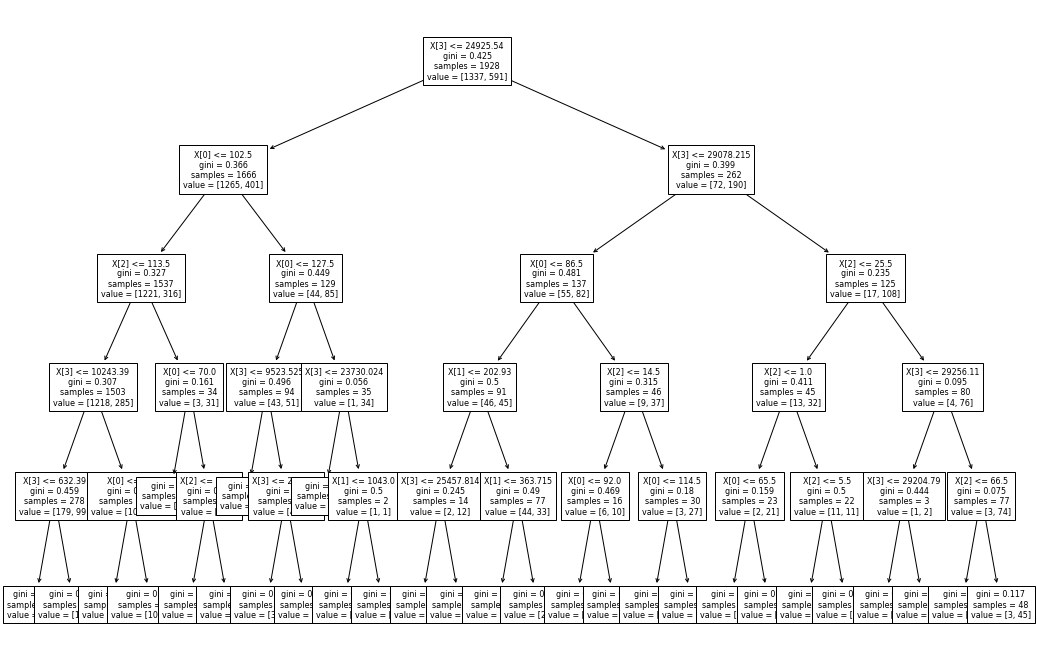

In [10]:
plt.figure(figsize=(18,12)) 
plot_tree(best_model_dt, fontsize=8)
plt.show()

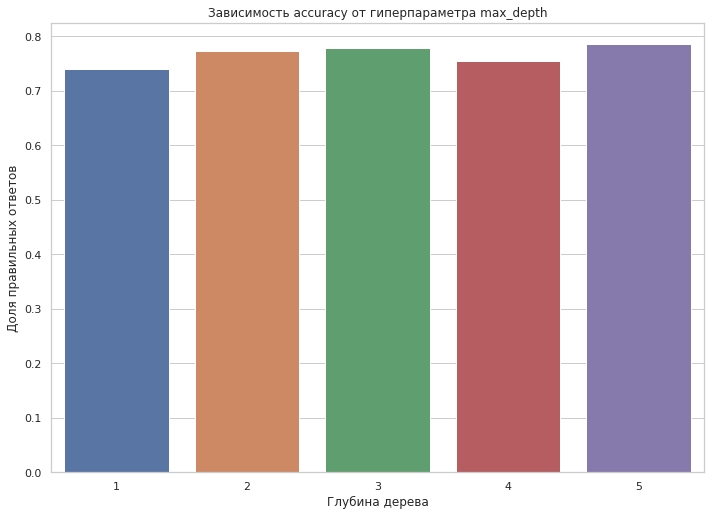

In [11]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_theme(style="whitegrid")
ax = sns.barplot(x=depth_list, y=result_list)
ax.set(xlabel='Глубина дерева', ylabel='Доля правильных ответов', title='Зависимость accuracy от гиперпараметра max_depth');

Случайный лес:

In [12]:
%%time

best_model_rf = None
best_result_rf = 0
best_est = 0
best_depth_rf = 0
for est in range(10, 51, 10):
    for depth in range (1, 11):
        model = RandomForestClassifier(random_state=12345, n_estimators = est, max_depth=depth) # инициализируем модель RandomForestClassifier 
        model.fit(features_train, target_train) # обучаем модель на тренировочной выборке
        predictions_valid = model.predict(features_valid) # получаем предсказания модели на валидационной выборке
        result = accuracy_score(target_valid, predictions_valid) # посчитаем значение метрики accuracy на валидационной выборке
        if result > best_result_rf:
            best_model_rf = model
            best_result_rf = result
            best_est = est
            best_depth_rf = depth

print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf, "Количество деревьев:", best_est, "Максимальная глубина:", best_depth_rf)

Accuracy наилучшей модели на валидационной выборке: 0.8211508553654744 Количество деревьев: 40 Максимальная глубина: 9
CPU times: user 4.09 s, sys: 27.6 ms, total: 4.11 s
Wall time: 4.11 s


Логистическая регрессия:

In [13]:
model_lr = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=1000) # инициализируем модель LogisticRegression 
model_lr.fit(features_train, target_train) # обучаем модель на тренировочной выборке
predictions_valid = model_lr.predict(features_valid) # получаем предсказания модели на валидационной выборке
result_lr = accuracy_score(target_valid, predictions_valid) # посчитаем значение метрики accuracy на валидационной выборке
print("Accuracy модели на валидационной выборке:", result_lr)

Accuracy модели на валидационной выборке: 0.7387247278382582


**Выводы**

Наилучший результат на валидационной выборке показала модель случайного леса с числом деревьев 40 и максимальной
глубиной дерева 9 - доля правильных ответов составляет 82,1 %. Второй результат показала модель решающего дерева
с максимальной глубиной дерева 5 - в этом случае показатель правильности accuracy равен 78,5 %, при этом модель работает
значительно быстрее. Третье место - у модели логистической регрессии с accuracy равным 73,9 %.

## Проверьте модель на тестовой выборке

Случайный лес:

In [14]:
model = RandomForestClassifier(random_state=12345, n_estimators = 40, max_depth=9) # инициализируем модель RandomForestClassifier 
model.fit(pd.concat([features_train, features_valid]), pd.concat([target_train, target_valid])) # обучаем модель на тренировочной выборке
predictions_test = model.predict(features_test) # получаем предсказания модели на тестовой выборке
result = accuracy_score(target_test, predictions_test) # посчитаем значение метрики accuracy на тестовой выборке
print("Accuracy наилучшей модели RandomForestClassifier на тестовой выборке:", result)    

Accuracy наилучшей модели RandomForestClassifier на тестовой выборке: 0.8289269051321928


**Выводы**

Доля правильных ответов на тестовой выборке модели случайного леса с числом деревьев 40 и максимальной глубиной дерева 9 составляет 83,0 %.

## (бонус) Проверьте модели на адекватность

Рассчитываем accuracy константной модели: любому объекту она прогнозирует класс «0»:

In [15]:
target_pred_constant = pd.Series(0, index = target_test.index)
print(accuracy_score(target_test, target_pred_constant))

0.6936236391912908


Очевидные границы: accuracy не может быть меньше нуля (все ответы неправильные) и больше единицы (все ответы правильные). Всегда стоит сравнивать модель со случайной - так мы сможем оценить её адекватность, или проверить на вменяемость. Случайные ответы даёт долю правильных ответов, равной 69 %, то есть результат 83 % на самом деле не является высоким. 

## Общие выводы

Исследование прошло в 5 этапов:
1. Изучение данные;
2. Разбиение данных на выборки;
3. Исследование качества разных моделей, меняя гиперпараметры;
4. Проверка качества модели на тестовой выборке;
5. Проверка модели на вменяемость. 
 
На первом этапе был выполнен обзор данных, в ходе которого определялось их качество и наличие ошибок. Предобработка данных не понадобилась.

На второй этапе исходные данные разделялись на обучающую, валидационную и тестовую выборки в соотношении 60%, 20% и 20% соответственно.

На третьем этапе исследовалось качество разных моделей. Наилучший результат на валидационной выборке показала модель случайного леса с числом деревьев 40 и максимальной глубиной дерева 10 - доля правильных ответов составляет 80,9 %. Второй результат показала модель решающего дерева с максимальной глубиной дерева 5 - в этом случае показатель правильности accuracy равен 78,5 %, при этом модель работает значительно быстрее. Третье место - у модели логистической регрессии с accuracy равным 71,1 %.

На четвёртом этапе проверялось качество моделей уже на тестовой выборке - доля правильных ответов лучшей модели составляет 80,1 %.

На заключительном этапе проверялась модель на адекватность. Так как результат оказался значительно выше, чем у случайных ответов, можно сказать, что модель вменяема. 